In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.utils import shuffle
%matplotlib inline

In [2]:
pd.options.display.max_columns = None

attrition = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition = shuffle(attrition)
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
213,51,No,Travel_Rarely,1469,Research & Development,8,4,Life Sciences,1,296,2,Male,81,2,3,Research Director,2,Married,12490,15736,5,Y,No,16,3,4,80,2,16,5,1,10,9,4,7
1318,29,No,Travel_Frequently,574,Research & Development,20,1,Medical,1,1852,4,Male,40,3,1,Laboratory Technician,4,Married,3812,7003,1,Y,No,13,3,2,80,0,11,3,4,11,8,3,10
434,31,No,Travel_Rarely,1274,Research & Development,9,1,Life Sciences,1,581,3,Male,33,3,3,Manufacturing Director,2,Divorced,10648,14394,1,Y,No,25,4,4,80,1,13,6,4,13,8,0,8
1443,42,No,Travel_Rarely,300,Research & Development,2,3,Life Sciences,1,2031,1,Male,56,3,5,Manager,3,Married,18880,17312,5,Y,No,11,3,1,80,0,24,2,2,22,6,4,14
345,23,No,Travel_Rarely,1309,Research & Development,26,1,Life Sciences,1,465,3,Male,83,3,1,Research Scientist,4,Divorced,2904,16092,1,Y,No,12,3,3,80,2,4,2,2,4,2,0,2


In [3]:
attrition_no = attrition[attrition['Attrition'] == 'No'].iloc[:550]
attrition_no

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
213,51,No,Travel_Rarely,1469,Research & Development,8,4,Life Sciences,1,296,2,Male,81,2,3,Research Director,2,Married,12490,15736,5,Y,No,16,3,4,80,2,16,5,1,10,9,4,7
1318,29,No,Travel_Frequently,574,Research & Development,20,1,Medical,1,1852,4,Male,40,3,1,Laboratory Technician,4,Married,3812,7003,1,Y,No,13,3,2,80,0,11,3,4,11,8,3,10
434,31,No,Travel_Rarely,1274,Research & Development,9,1,Life Sciences,1,581,3,Male,33,3,3,Manufacturing Director,2,Divorced,10648,14394,1,Y,No,25,4,4,80,1,13,6,4,13,8,0,8
1443,42,No,Travel_Rarely,300,Research & Development,2,3,Life Sciences,1,2031,1,Male,56,3,5,Manager,3,Married,18880,17312,5,Y,No,11,3,1,80,0,24,2,2,22,6,4,14
345,23,No,Travel_Rarely,1309,Research & Development,26,1,Life Sciences,1,465,3,Male,83,3,1,Research Scientist,4,Divorced,2904,16092,1,Y,No,12,3,3,80,2,4,2,2,4,2,0,2
1259,30,No,Travel_Rarely,305,Research & Development,16,3,Life Sciences,1,1763,3,Male,58,4,2,Healthcare Representative,3,Married,5294,9128,3,Y,No,16,3,3,80,1,10,3,3,7,0,1,7
1054,49,No,Travel_Rarely,1490,Research & Development,7,4,Life Sciences,1,1484,3,Male,35,3,3,Healthcare Representative,2,Divorced,10466,20948,3,Y,No,14,3,2,80,2,29,3,3,8,7,0,7
1368,34,No,Travel_Frequently,735,Research & Development,22,4,Other,1,1932,3,Male,86,2,2,Research Scientist,4,Married,5747,26496,1,Y,Yes,15,3,2,80,0,16,3,3,15,10,6,11
1065,55,No,Travel_Rarely,1229,Research & Development,4,4,Life Sciences,1,1501,4,Male,30,3,2,Healthcare Representative,3,Married,4035,16143,0,Y,Yes,16,3,2,80,0,4,2,3,3,2,1,2
242,41,No,Travel_Rarely,1411,Research & Development,19,2,Life Sciences,1,334,3,Male,36,3,2,Research Scientist,1,Divorced,3072,19877,2,Y,No,16,3,1,80,2,17,2,2,1,0,0,0


In [4]:
attrition_yes = attrition[attrition['Attrition'] == 'Yes']
attrition_yes

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
107,25,Yes,Travel_Rarely,240,Sales,5,3,Marketing,1,142,3,Male,46,2,2,Sales Executive,3,Single,5744,26959,1,Y,Yes,11,3,4,80,0,6,1,3,6,4,0,3
204,38,Yes,Travel_Rarely,1180,Research & Development,29,1,Medical,1,282,2,Male,70,3,2,Healthcare Representative,1,Married,6673,11354,7,Y,Yes,19,3,2,80,0,17,2,3,1,0,0,0
1257,31,Yes,Travel_Rarely,1079,Sales,16,4,Marketing,1,1761,1,Male,70,3,3,Sales Executive,3,Married,8161,19002,2,Y,No,13,3,1,80,3,10,2,3,1,0,0,0
288,26,Yes,Travel_Rarely,1449,Research & Development,16,4,Medical,1,394,1,Male,45,3,1,Laboratory Technician,2,Divorced,2373,14180,2,Y,Yes,13,3,4,80,1,5,2,3,3,2,0,2
1365,29,Yes,Travel_Frequently,746,Sales,24,3,Technical Degree,1,1928,3,Male,45,4,1,Sales Representative,1,Single,1091,10642,1,Y,No,17,3,4,80,0,1,3,3,1,0,0,0
871,24,Yes,Travel_Rarely,984,Research & Development,17,2,Life Sciences,1,1219,4,Female,97,3,1,Laboratory Technician,2,Married,2210,3372,1,Y,No,13,3,1,80,1,1,3,1,1,0,0,0
744,37,Yes,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1033,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3
443,22,Yes,Travel_Frequently,1368,Research & Development,4,1,Technical Degree,1,593,3,Male,99,2,1,Laboratory Technician,3,Single,3894,9129,5,Y,No,16,3,3,80,0,4,3,3,2,2,1,2
1369,28,Yes,Travel_Rarely,1475,Sales,13,2,Marketing,1,1933,4,Female,84,3,2,Sales Executive,3,Single,9854,23352,3,Y,Yes,11,3,4,80,0,6,0,3,2,0,2,2


In [5]:
attrition = pd.concat([attrition_yes, attrition_no])
attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
107,25,Yes,Travel_Rarely,240,Sales,5,3,Marketing,1,142,3,Male,46,2,2,Sales Executive,3,Single,5744,26959,1,Y,Yes,11,3,4,80,0,6,1,3,6,4,0,3
204,38,Yes,Travel_Rarely,1180,Research & Development,29,1,Medical,1,282,2,Male,70,3,2,Healthcare Representative,1,Married,6673,11354,7,Y,Yes,19,3,2,80,0,17,2,3,1,0,0,0
1257,31,Yes,Travel_Rarely,1079,Sales,16,4,Marketing,1,1761,1,Male,70,3,3,Sales Executive,3,Married,8161,19002,2,Y,No,13,3,1,80,3,10,2,3,1,0,0,0
288,26,Yes,Travel_Rarely,1449,Research & Development,16,4,Medical,1,394,1,Male,45,3,1,Laboratory Technician,2,Divorced,2373,14180,2,Y,Yes,13,3,4,80,1,5,2,3,3,2,0,2
1365,29,Yes,Travel_Frequently,746,Sales,24,3,Technical Degree,1,1928,3,Male,45,4,1,Sales Representative,1,Single,1091,10642,1,Y,No,17,3,4,80,0,1,3,3,1,0,0,0
871,24,Yes,Travel_Rarely,984,Research & Development,17,2,Life Sciences,1,1219,4,Female,97,3,1,Laboratory Technician,2,Married,2210,3372,1,Y,No,13,3,1,80,1,1,3,1,1,0,0,0
744,37,Yes,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1033,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3
443,22,Yes,Travel_Frequently,1368,Research & Development,4,1,Technical Degree,1,593,3,Male,99,2,1,Laboratory Technician,3,Single,3894,9129,5,Y,No,16,3,3,80,0,4,3,3,2,2,1,2
1369,28,Yes,Travel_Rarely,1475,Sales,13,2,Marketing,1,1933,4,Female,84,3,2,Sales Executive,3,Single,9854,23352,3,Y,Yes,11,3,4,80,0,6,0,3,2,0,2,2


In [6]:
# Check data quality
attrition.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

/home/t-yowu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


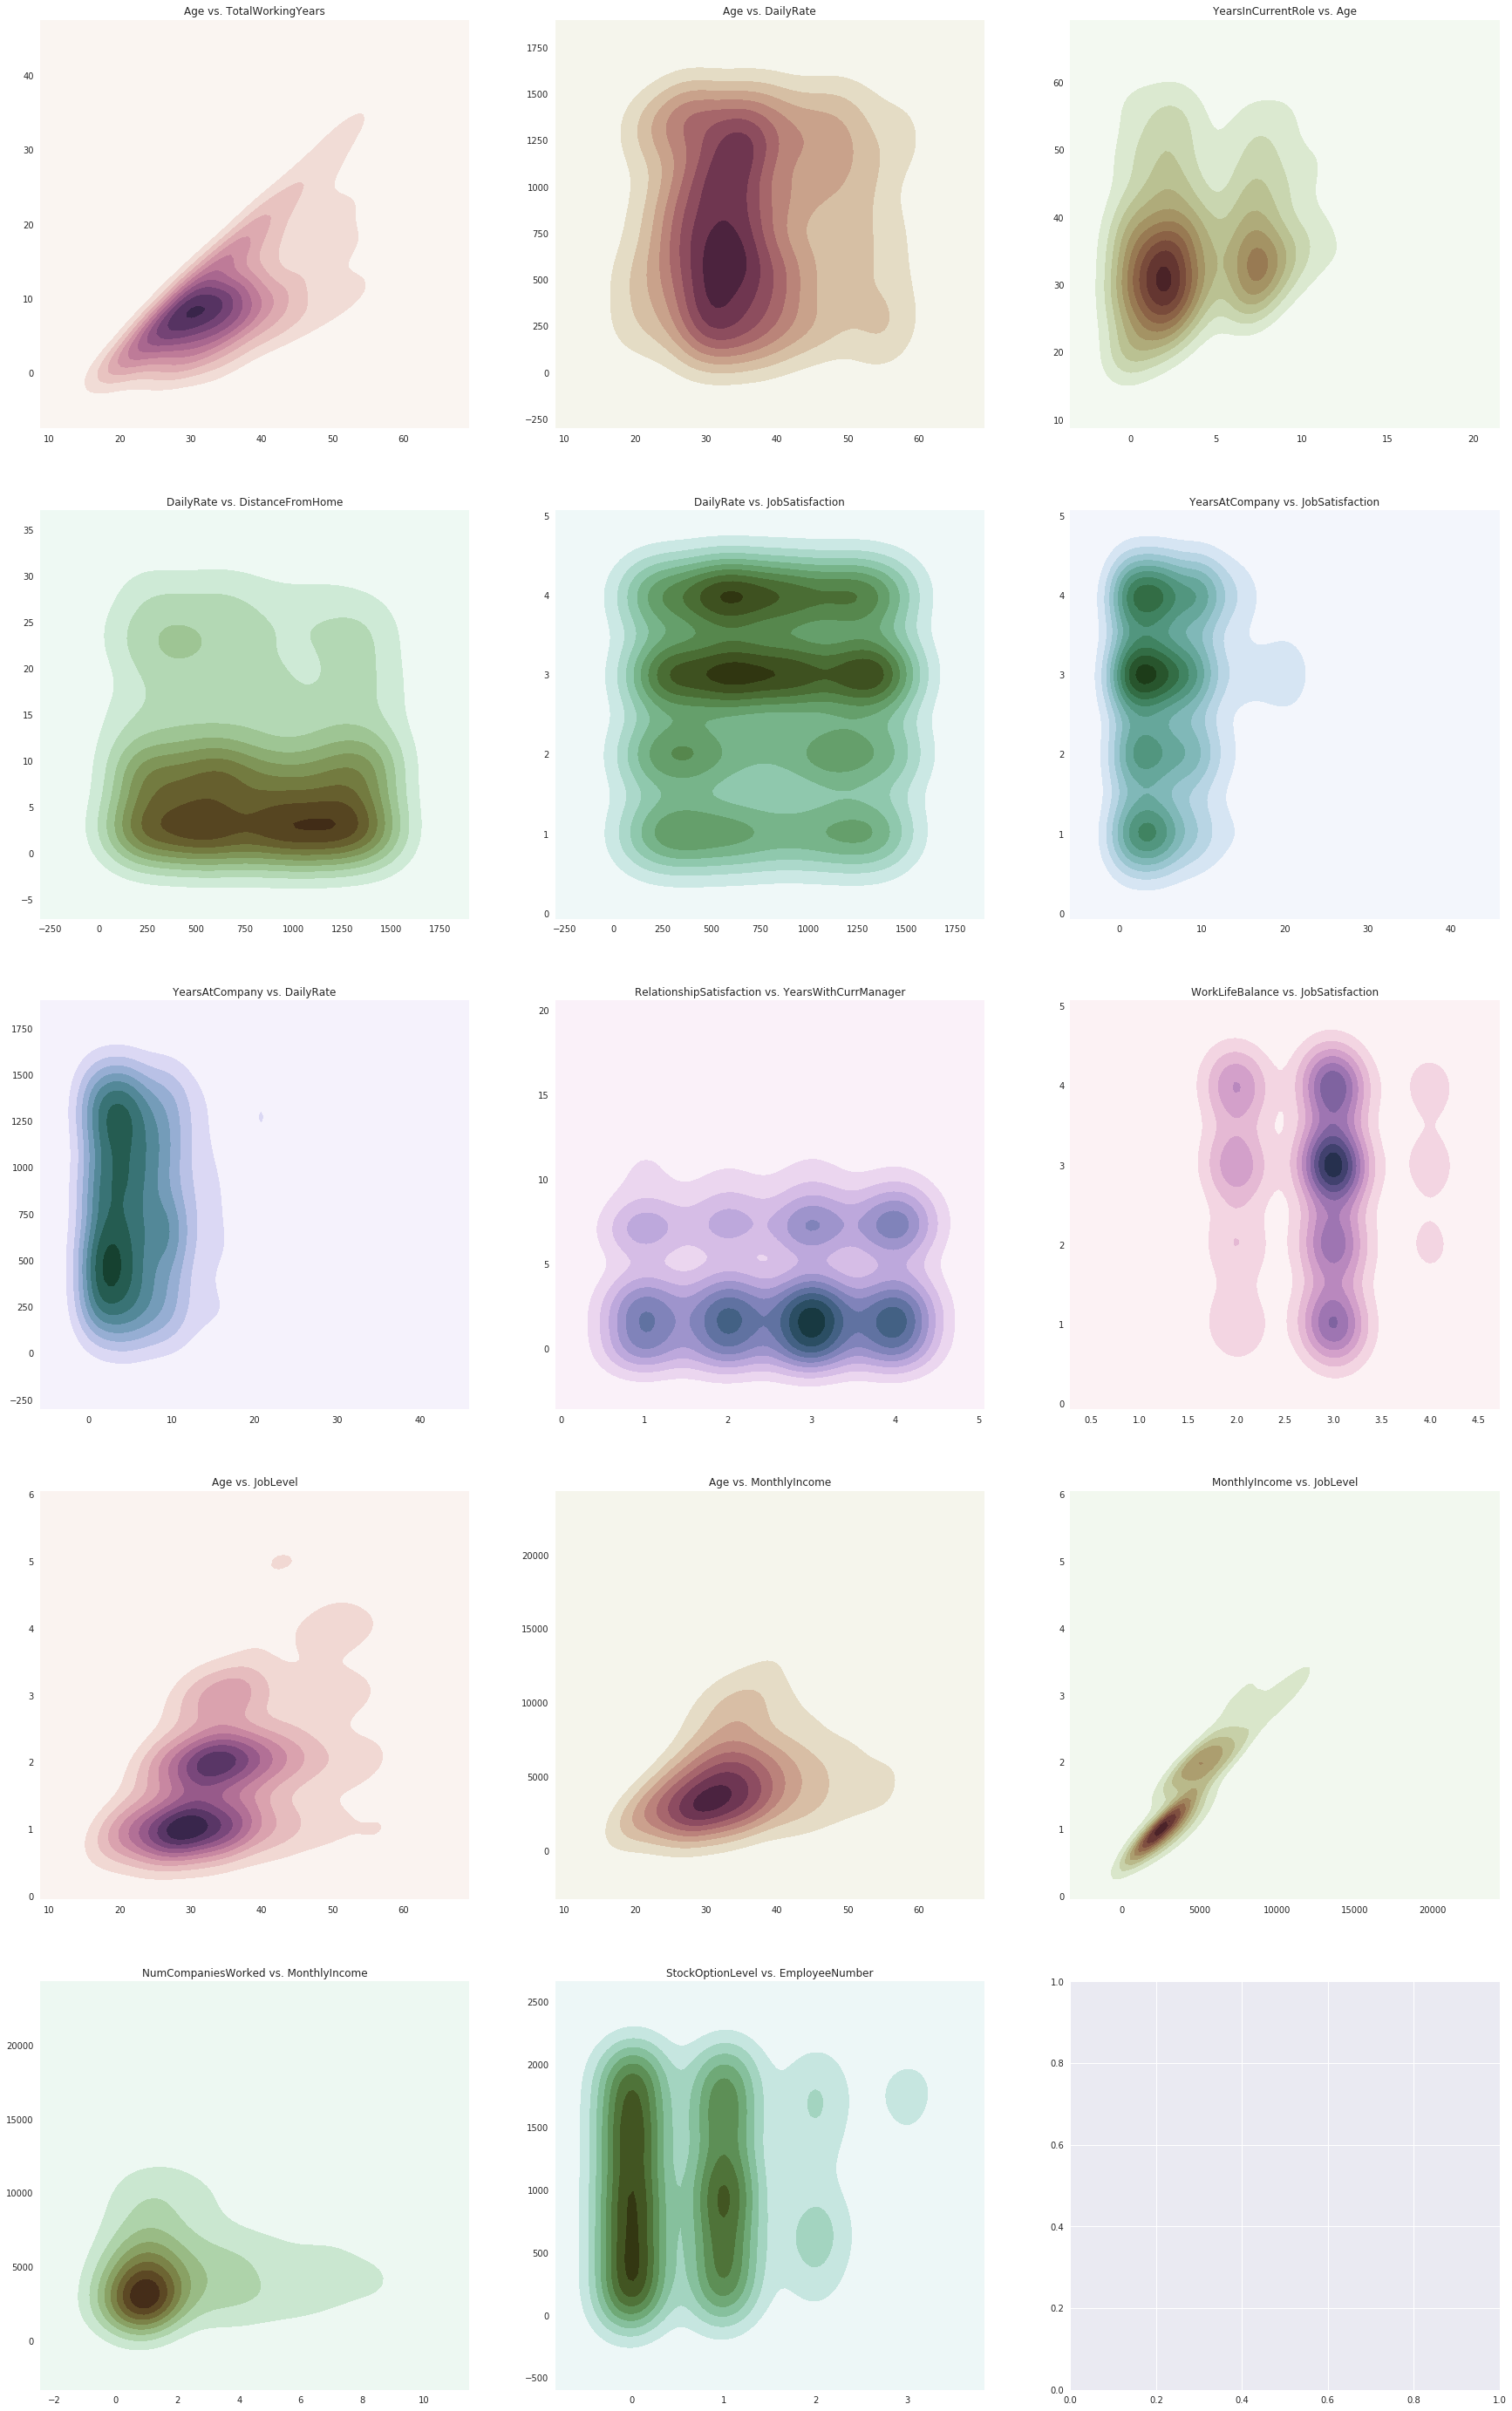

In [7]:
# Creating subplots
f, axes = plt.subplots(5, 3, figsize=(30,50), sharex=False, sharey=False)

# Set color palette
color_start = 0.0
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
axes_x = 0
axes_y = 0

def plot_xy(x_label, y_label):
    global color_start, cmap, axes, axes_x, axes_y
    x = attrition[x_label].values
    y = attrition[y_label].values
    sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[axes_x, axes_y])
    axes[axes_x, axes_y].set(title='{} vs. {}'.format(x_label, y_label))
    axes_y = axes_y + 1
    if axes_y == 3:
        axes_y = 0
        axes_x = axes_x + 1
    color_start = color_start + 0.33
    cmap = sns.cubehelix_palette(start=color_start, light=1, as_cmap=True)


plot_xy('Age', 'TotalWorkingYears')
plot_xy('Age', 'DailyRate')
plot_xy('YearsInCurrentRole', 'Age')
plot_xy('DailyRate', 'DistanceFromHome')
plot_xy('DailyRate', 'JobSatisfaction')
plot_xy('YearsAtCompany', 'JobSatisfaction')
plot_xy('YearsAtCompany', 'DailyRate')
plot_xy('RelationshipSatisfaction', 'YearsWithCurrManager')
plot_xy('WorkLifeBalance', 'JobSatisfaction')
plot_xy('Age', 'JobLevel')
plot_xy('Age', 'MonthlyIncome')
plot_xy('MonthlyIncome', 'JobLevel')
plot_xy('NumCompaniesWorked', 'MonthlyIncome')
plot_xy('StockOptionLevel', 'EmployeeNumber')

/home/t-yowu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


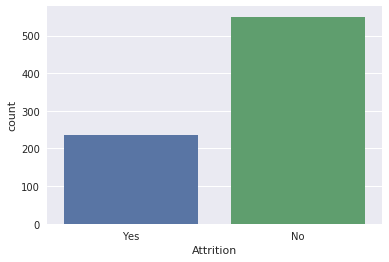

In [8]:
# Convert attrition to numericals
target_map = {'Yes':1, 'No':0}
attrition[u'Attrition_num'] = attrition[u'Attrition'].apply(lambda x: target_map[x])

sns.countplot(x='Attrition', data=attrition)


/home/t-yowu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


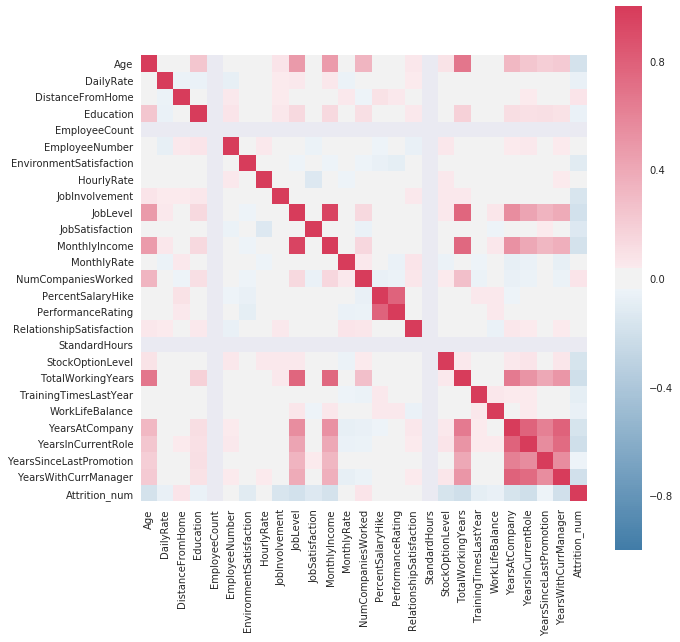

In [9]:


# Remove non-numerical columns
attrition_numerical_cols = attrition._get_numeric_data()
corr = attrition_numerical_cols.corr()

# Graph heatmap to visualize correlations between data
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(240, 5, as_cmap=True)
sns.heatmap(corr, cmap=cmap, square=True, ax=ax)

/home/t-yowu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


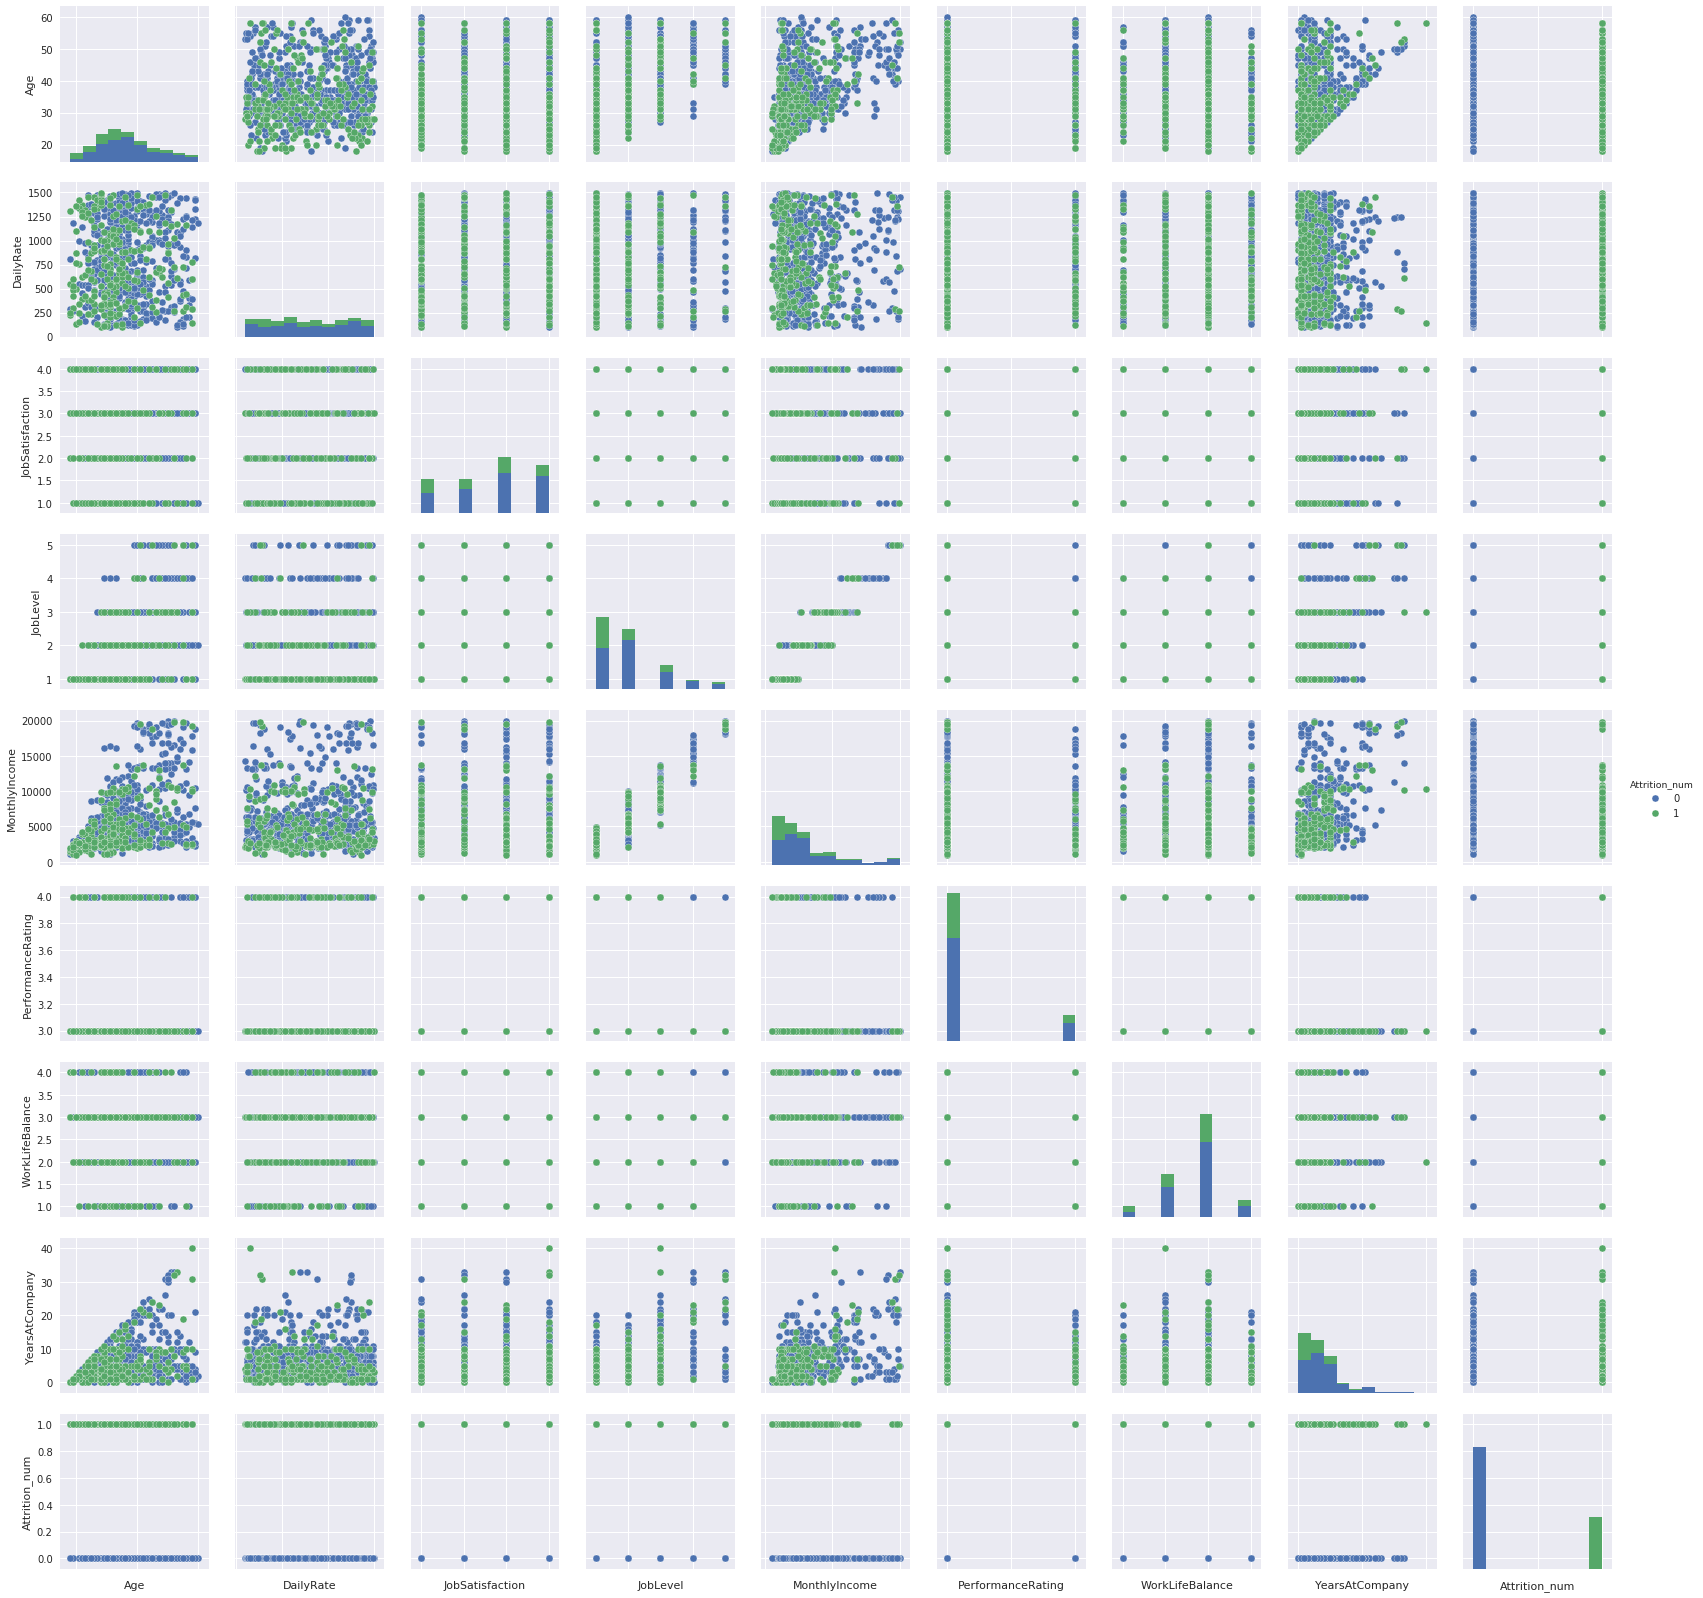

In [10]:
numerical = ['Age', 'DailyRate', 'JobSatisfaction', 'JobLevel', 'MonthlyIncome', 'PerformanceRating', 'WorkLifeBalance', 'YearsAtCompany', 'Attrition_num']

# Plot pairplot to visualize correlations
g = sns.pairplot(attrition[numerical], hue='Attrition_num')
g.set(xticklabels=[])

In [11]:
categorical = attrition.select_dtypes(include=['object'])
categorical

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
107,Yes,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Single,Y,Yes
204,Yes,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,Yes
1257,Yes,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Married,Y,No
288,Yes,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Divorced,Y,Yes
1365,Yes,Travel_Frequently,Sales,Technical Degree,Male,Sales Representative,Single,Y,No
871,Yes,Travel_Rarely,Research & Development,Life Sciences,Female,Laboratory Technician,Married,Y,No
744,Yes,Travel_Rarely,Research & Development,Medical,Female,Healthcare Representative,Married,Y,No
14,Yes,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Y,Yes
443,Yes,Travel_Frequently,Research & Development,Technical Degree,Male,Laboratory Technician,Single,Y,No
1369,Yes,Travel_Rarely,Sales,Marketing,Female,Sales Executive,Single,Y,Yes


In [12]:
numerical = attrition_numerical_cols.drop(u'Attrition_num', 1)
numerical

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
107,25,240,5,3,1,142,3,46,2,2,3,5744,26959,1,11,3,4,80,0,6,1,3,6,4,0,3
204,38,1180,29,1,1,282,2,70,3,2,1,6673,11354,7,19,3,2,80,0,17,2,3,1,0,0,0
1257,31,1079,16,4,1,1761,1,70,3,3,3,8161,19002,2,13,3,1,80,3,10,2,3,1,0,0,0
288,26,1449,16,4,1,394,1,45,3,1,2,2373,14180,2,13,3,4,80,1,5,2,3,3,2,0,2
1365,29,746,24,3,1,1928,3,45,4,1,1,1091,10642,1,17,3,4,80,0,1,3,3,1,0,0,0
871,24,984,17,2,1,1219,4,97,3,1,2,2210,3372,1,13,3,1,80,1,1,3,1,1,0,0,0
744,37,1141,11,2,1,1033,1,61,1,2,2,4777,14382,5,15,3,1,80,0,15,2,1,1,0,0,0
14,28,103,24,3,1,19,3,50,2,1,3,2028,12947,5,14,3,2,80,0,6,4,3,4,2,0,3
443,22,1368,4,1,1,593,3,99,2,1,3,3894,9129,5,16,3,3,80,0,4,3,3,2,2,1,2
1369,28,1475,13,2,1,1933,4,84,3,2,3,9854,23352,3,11,3,4,80,0,6,0,3,2,0,2,2


In [13]:
categorical = pd.get_dummies(categorical)
categorical

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
107,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
204,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1257,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0
288,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
1365,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0
871,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
744,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
14,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
443,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0
1369,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1


In [14]:
pd.options.display.max_columns = None
input_data = pd.concat([numerical, categorical], axis=1)
input_data

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
107,25,240,5,3,1,142,3,46,2,2,3,5744,26959,1,11,3,4,80,0,6,1,3,6,4,0,3,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
204,38,1180,29,1,1,282,2,70,3,2,1,6673,11354,7,19,3,2,80,0,17,2,3,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1257,31,1079,16,4,1,1761,1,70,3,3,3,8161,19002,2,13,3,1,80,3,10,2,3,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0
288,26,1449,16,4,1,394,1,45,3,1,2,2373,14180,2,13,3,4,80,1,5,2,3,3,2,0,2,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
1365,29,746,24,3,1,1928,3,45,4,1,1,1091,10642,1,17,3,4,80,0,1,3,3,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0
871,24,984,17,2,1,1219,4,97,3,1,2,2210,3372,1,13,3,1,80,1,1,3,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
744,37,1141,11,2,1,1033,1,61,1,2,2,4777,14382,5,15,3,1,80,0,15,2,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
14,28,103,24,3,1,19,3,50,2,1,3,2028,12947,5,14,3,2,80,0,6,4,3,4,2,0,3,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
443,22,1368,4,1,1,593,3,99,2,1,3,3894,9129,5,16,3,3,80,0,4,3,3,2,2,1,2,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0
1369,28,1475,13,2,1,1933,4,84,3,2,3,9854,23352,3,11,3,4,80,0,6,0,3,2,0,2,2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1


In [15]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
np_scaled = min_max_scaler.fit_transform(input_data)
input_data_normalized = pd.DataFrame(np_scaled, columns=input_data.columns.values)
input_data_normalized

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.166667,0.098996,0.142857,0.50,0.0,0.068215,0.666667,0.228571,0.333333,0.25,0.666667,0.249342,0.998392,0.111111,0.000000,0.0,1.000000,0.0,0.000000,0.150,0.166667,0.666667,0.150,0.222222,0.000000,0.176471,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.476190,0.773314,1.000000,0.00,0.0,0.135946,0.333333,0.571429,0.666667,0.25,0.000000,0.298262,0.371030,0.777778,0.571429,0.0,0.333333,0.0,0.000000,0.425,0.333333,0.666667,0.025,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.309524,0.700861,0.535714,0.75,0.0,0.851476,0.000000,0.571429,0.666667,0.50,0.666667,0.376619,0.678500,0.222222,0.142857,0.0,0.000000,0.0,1.000000,0.250,0.333333,0.666667,0.025,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.190476,0.966284,0.535714,0.75,0.0,0.190131,0.000000,0.214286,0.666667,0.00,0.333333,0.071827,0.484643,0.222222,0.142857,0.0,1.000000,0.0,0.333333,0.125,0.333333,0.666667,0.075,0.111111,0.000000,0.117647,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.261905,0.461980,0.821429,0.50,0.0,0.932269,0.666667,0.214286,1.000000,0.00,0.000000,0.004318,0.342406,0.111111,0.428571,0.0,1.000000,0.0,0.000000,0.025,0.500000,0.666667,0.025,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.142857,0.632712,0.571429,0.25,0.0,0.589260,1.000000,0.957143,0.666667,0.00,0.333333,0.063244,0.050133,0.111111,0.142857,0.0,0.000000,0.0,0.333333,0.025,0.500000,0.000000,0.025,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,0.452381,0.745337,0.357143,0.25,0.0,0.499274,0.000000,0.442857,0.000000,0.25,0.333333,0.198420,0.492764,0.555556,0.285714,0.0,0.000000,0.0,0.000000,0.375,0.333333,0.000000,0.025,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.238095,0.000717,0.821429,0.50,0.0,0.008708,0.666667,0.285714,0.333333,0.00,0.666667,0.053660,0.435073,0.555556,0.214286,0.0,0.333333,0.0,0.000000,0.150,0.666667,0.666667,0.100,0.111111,0.000000,0.176471,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,0.095238,0.908178,0.107143,0.00,0.0,0.286405,0.666667,0.985714,0.333333,0.00,0.666667,0.151922,0.281579,0.555556,0.357143,0.0,0.666667,0.0,0.000000,0.100,0.500000,0.666667,0.050,0.111111,0.066667,0.117647,0.0,1.

In [79]:
input_data_labels = input_data_normalized[['Attrition_No', 'Attrition_Yes']]
input_data_nums = input_data_normalized.drop(['Attrition_Yes', 'Attrition_No'], axis=1)

In [94]:
training_data = input_data_nums[0:600]
training_labels = input_data_labels[0:600]

test_data = input_data_nums[600:]
test_labels = input_data_labels[600:]

training_data_batches = np.array_split(training_data, 10)
training_labels_batches = np.array_split(training_labels, 10)

for (data_batch, label_batch) in zip(training_data_batches, training_labels_batches):
    for (data, label) in zip(data_batch.values, label_batch.values):
        print(data, label)

[ 0.16666667  0.0989957   0.14285714  0.5         0.          0.0682148
  0.66666667  0.22857143  0.33333333  0.25        0.66666667  0.24934176
  0.9983919   0.11111111  0.          0.          1.          0.          0.
  0.15        0.16666667  0.66666667  0.15        0.22222222  0.
  0.17647059  0.          0.          1.          0.          0.          1.
  0.          0.          1.          0.          0.          0.          0.
  1.          0.          0.          0.          0.          0.          0.
  0.          1.          0.          0.          0.          1.          0.
  0.          1.        ] [ 0.  1.]
[ 0.47619048  0.7733142   1.          0.          0.          0.13594582
  0.33333333  0.57142857  0.66666667  0.25        0.          0.29826224
  0.37102999  0.77777778  0.57142857  0.          0.33333333  0.          0.
  0.425       0.33333333  0.66666667  0.025       0.          0.          0.
  0.          0.          1.          0.          1.          0.     

  0.          1.        ] [ 0.  1.]
[ 0.38095238  0.63558106  0.78571429  0.5         0.          0.28495404
  0.33333333  0.18571429  0.66666667  0.5         0.          0.47082675
  0.37822626  1.          0.28571429  0.          0.66666667  0.          1.
  0.275       0.33333333  0.66666667  0.075       0.11111111  0.
  0.11764706  0.          1.          0.          1.          0.          0.
  1.          0.          0.          0.          0.          0.          1.
  0.          0.          1.          0.          0.          0.          0.
  0.          0.          0.          1.          0.          0.          0.
  0.          1.        ] [ 0.  1.]
[ 0.30952381  0.18436155  0.60714286  1.          0.          0.8906628   1.
  0.84285714  1.          0.          0.          0.10252765  0.77872477
  0.          0.42857143  0.          0.66666667  0.          0.          0.05
  0.66666667  0.66666667  0.025       0.          0.          0.          0.
  0.          1.          

  0.          1.          0.        ] [ 1.  0.]
[ 0.64285714  0.34935438  0.03571429  0.75        0.          0.89211418
  0.66666667  0.52857143  0.66666667  0.25        0.66666667  0.21827278
  0.70515398  0.44444444  0.78571429  1.          0.33333333  0.
  0.66666667  0.25        0.5         1.          0.2         0.38888889
  0.33333333  0.41176471  1.          0.          0.          0.          0.
  1.          0.          1.          0.          0.          0.          0.
  1.          0.          0.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          1.          0.
  0.          1.          0.        ] [ 1.  0.]
[ 0.5         0.01004304  0.82142857  0.          0.          0.97387518
  0.          0.31428571  0.66666667  0.25        1.          0.16319115
  0.12925143  0.77777778  0.14285714  0.          0.          0.          0.
  0.45        0.33333333  0.66666667  0.175       0.38888889  0.06666667
  0.41176471  0.

  1.          0.        ] [ 1.  0.]
[ 0.85714286  0.70301291  0.03571429  0.75        0.          0.51717465
  0.66666667  0.15714286  0.33333333  0.5         0.66666667  0.50958399
  0.25194983  0.66666667  0.          0.          0.33333333  0.
  0.33333333  0.325       0.66666667  0.66666667  0.225       0.22222222
  0.46666667  0.          0.          0.          1.          0.          0.
  1.          0.          1.          0.          0.          0.          0.
  1.          0.          0.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          1.          0.
  0.          1.          0.        ] [ 1.  0.]
[ 0.28571429  0.38163558  0.57142857  0.75        0.          0.63860668
  0.33333333  0.92857143  0.66666667  0.5         0.          0.57435492
  0.95690279  0.11111111  0.85714286  1.          1.          0.
  0.66666667  0.225       0.33333333  0.66666667  0.225       0.05555556
  0.          0.47058824  0.          0.

  0.          1.          0.        ] [ 1.  0.]
[ 0.28571429  0.70301291  0.39285714  0.5         0.          0.25737784
  0.33333333  0.75714286  0.66666667  0.25        0.66666667  0.29320695
  0.7008523   0.          0.          0.          0.33333333  0.          0.
  0.15        1.          0.66666667  0.125       0.22222222  0.26666667
  0.23529412  0.          0.          1.          0.          0.          1.
  0.          0.          0.          0.          0.          1.          1.
  0.          0.          0.          0.          0.          0.          0.
  0.          1.          0.          0.          0.          1.          0.
  1.          0.        ] [ 1.  0.]
[ 0.33333333  0.50143472  0.          0.75        0.          0.97484277
  0.66666667  0.25714286  0.66666667  0.5         1.          0.49568194
  0.88071882  0.11111111  0.57142857  0.          0.66666667  0.
  0.66666667  0.35        0.5         0.66666667  0.35        0.55555556
  0.33333333  0.41176471  0.

numpy.ndarray

631